Рассмотрим датасет использованных автомобилей, который можно скачать тут https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho.

Описание датасета:

1. name - марка и модель автомобиля
2. year - год выпуска автомобиля
3. selling_price - цена автомобиля
4. km_driven - пробег автомобиля
5. fuel - вид топлива
6. seller_type - тип продавца
7. transmission - коробка передач
8. owner - сколько было собственников у машины

Необходимо решить задачу классификации и научиться предсказывать целовой признак selling_price. Сколько стоит автомобиль. 

In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [61]:
df = pd.read_csv('Data/carDetails.csv')

In [62]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Смотрим статистику по набору данных

In [37]:
df.count()

name             4340
year             4340
selling_price    4340
km_driven        4340
fuel             4340
seller_type      4340
transmission     4340
owner            4340
dtype: int64

In [38]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Смотрим какие значения могут принимать различные признаки. Затем мы будем это использовать для замены 

In [39]:
df['selling_price'].value_counts()

300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
2100000      1
828999       1
1119000      1
746000       1
865000       1
Name: selling_price, Length: 445, dtype: int64

Так как он принимает большое количество значений, то воспользуемся boxplot()(ящик с усами).

<AxesSubplot:xlabel='selling_price'>

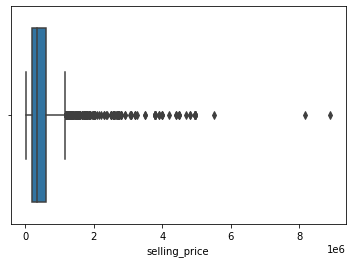

In [40]:
sns.boxplot(x=df['selling_price'])

Уберем выбросы из графика

<AxesSubplot:xlabel='selling_price'>

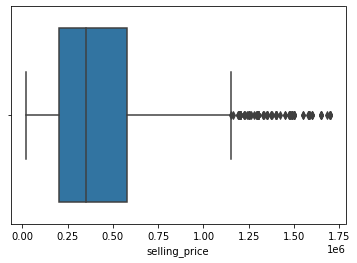

In [41]:
q = df['selling_price'].quantile(0.97)
df_2 = df[df['selling_price'] < q]
sns.boxplot(x=df_2['selling_price'])

# Первичный анализ признаков
## Категориальный признак name

Посмотрим разбитие на модели автомилей.

In [42]:
df_2['name'].value_counts()

Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Mahindra Scorpio SLX 2.6 Turbo 8 Str     1
Tata Tiago 1.05 Revotorq XT Option       1
Hyundai Creta 1.4 CRDi S                 1
Honda Brio Exclusive Edition             1
Hyundai i20 Magna 1.4 CRDi               1
Name: name, Length: 1436, dtype: int64

## Категориальный признак fuel

In [43]:
df_2['fuel'].value_counts()

Petrol      2107
Diesel      2038
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

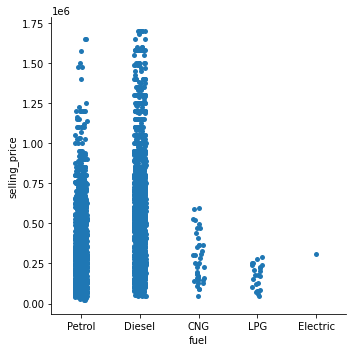

In [44]:
sns.catplot(y='selling_price',
            x='fuel',
            data=df_2);

## Категориальный признак seller_type

In [45]:
df_2['seller_type'].value_counts()

Individual          3189
Dealer               930
Trustmark Dealer      90
Name: seller_type, dtype: int64

Посмотрим как они разбиваются на группы

<AxesSubplot:xlabel='seller_type', ylabel='count'>

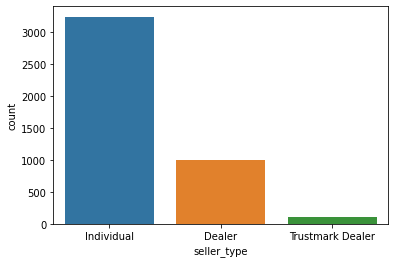

In [46]:
sns.countplot(x=df['seller_type'])

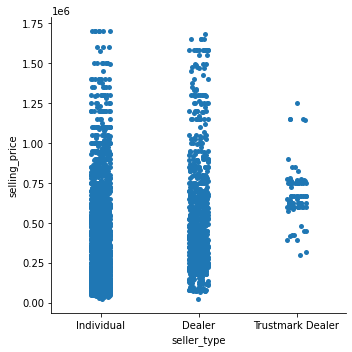

In [47]:
sns.catplot(y='selling_price',
            x='seller_type',
            data=df_2);

## Категориальный признак transmission

In [48]:
df_2['transmission'].value_counts()

Manual       3885
Automatic     324
Name: transmission, dtype: int64

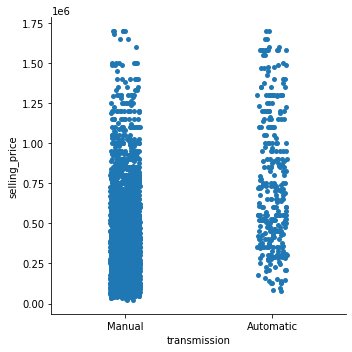

In [49]:
sns.catplot(y='selling_price',
            x='transmission',
            data=df_2);

## Порядковый признак owner

In [50]:
df_2['owner'].value_counts()

First Owner             2715
Second Owner            1094
Third Owner              302
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

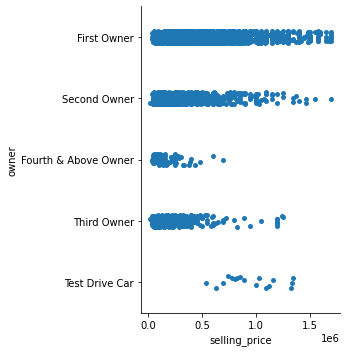

In [51]:

sns.catplot(x='selling_price',
            y='owner',
            data=df_2);

# Создание нового признака

Т.к. моделей слишком много, создадимновый признак brand, который будет состоять только из названия производителя автомобиля.

In [52]:
df_2['brand'] = 0
for i in df_2:
    df_2['brand']=df_2['name'].str.extract('([A-Za-z]+)\ ')

In [53]:
df_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [54]:
df_2['brand'].value_counts()

Maruti        1280
Hyundai        821
Mahindra       363
Tata           361
Honda          251
Ford           228
Chevrolet      188
Toyota         174
Renault        146
Volkswagen     107
Skoda           68
Nissan          64
Audi            39
Datsun          37
Fiat            37
Benz            14
BMW             12
Mitsubishi       6
Ambassador       4
Jeep             3
OpelCorsa        2
Daewoo           1
Force            1
Isuzu            1
Kia              1
Name: brand, dtype: int64

Построим график "виолончели"

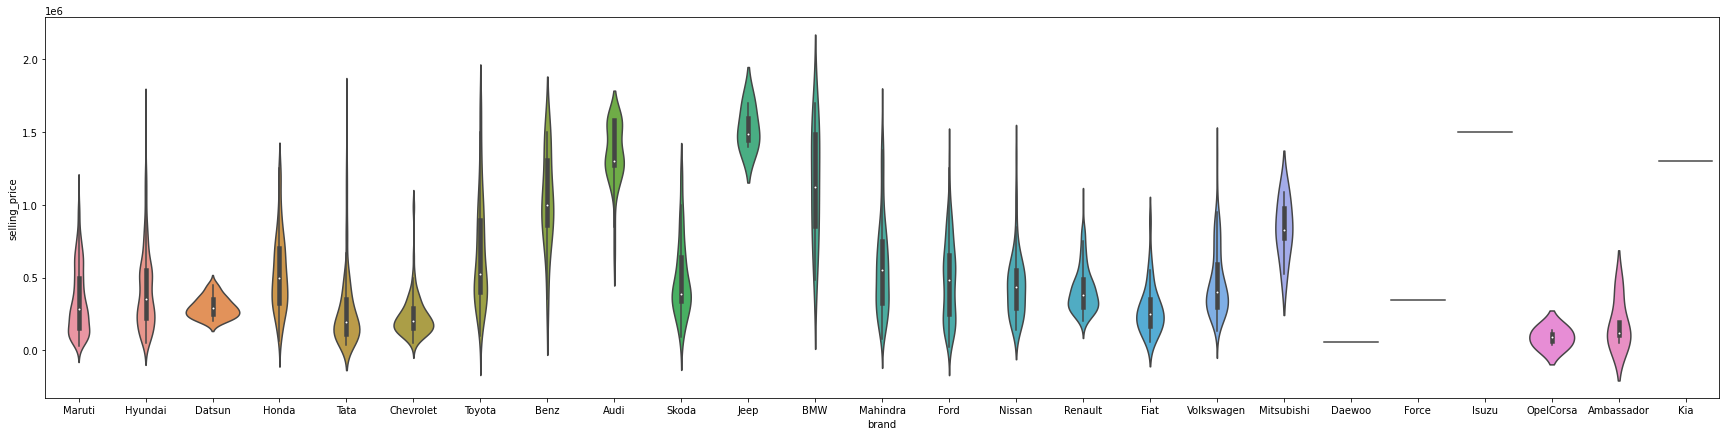

In [55]:
sns.violinplot(data=df_2,x="brand", y="selling_price", split=True)
fig = plt.gcf()
fig.set_size_inches(30, 7)

Мы можем увидеть, что часть марок не обладает каким-нибудь большим колическвом данных. 
Также, что большинство имееют машины в каком-нибудь одном ценовом сегменте. 
Исключением является BMW

# Трансформация строк в числа

In [19]:
df_2['fuel'].replace(['Diesel', 'Petrol', 'CNG', 'LPG', 'Electric'], [0, 1, 2, 3, 4], inplace=True)
df_2['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'], [0, 1, 2], inplace=True)
df_2['transmission'].replace(['Manual', 'Automatic'], [0, 1], inplace=True)
df_2['owner'].replace(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'], [0, 1, 2, 3, 4], inplace=True)
df_2['brand'].replace(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Honda',
                      'Ford', 'Chevrolet', 'Toyota', 'Renault', 'Volkswagen',
                      'Skoda', 'Nissan', 'Audi', 'Datsun', 'Fiat',
                      'Benz', 'BMW', 'Mitsubishi', 'Ambassador', 'Jeep',
                      'OpelCorsa', 'Daewoo', 'Force', 'Isuzu', 'Kia'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], inplace=True)

In [20]:
df_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,1,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0,13
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1,4


Проверим, что мы все сделали правильно

In [21]:
df_2['brand'].value_counts()

0     1280
1      821
2      363
3      361
4      251
5      228
6      188
7      174
8      146
9      107
10      68
11      64
12      39
13      37
14      37
15      14
16      12
17       6
18       4
19       3
20       2
21       1
22       1
23       1
24       1
Name: brand, dtype: int64

In [22]:
df_2['seller_type'].value_counts()

0    3189
1     930
2      90
Name: seller_type, dtype: int64

In [23]:
df_2['transmission'].value_counts()

0    3885
1     324
Name: transmission, dtype: int64

In [24]:
df_2['fuel'].value_counts()

1    2107
0    2038
2      40
3      23
4       1
Name: fuel, dtype: int64

Данные сходятся, поэтому трансформация прошла успешно

## Удаление ненужных признаков

Name –– так как мы уже создали более удобный признак brand.

In [25]:
df_2.drop(['name'], axis=1, inplace=True)

## Корреляция признаков

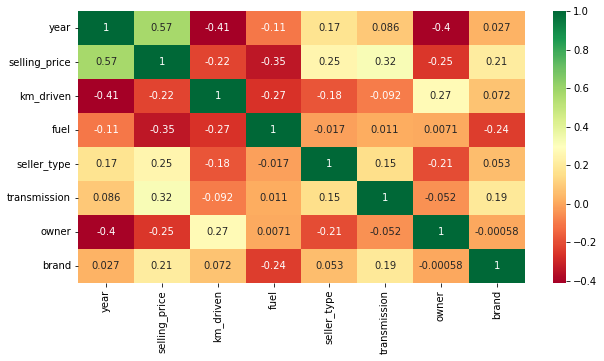

In [26]:
sns.heatmap(df_2.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [28]:
df_2.to_csv('newCarDetails.csv')

## Выводы
Сильной корреляции не наблюдается. Можно увидеть, что цена машины сильно зависит от года ее выпуска